# 信用情報


## 【問題1】コンペティション内容の把握

- Home Creditはどのような企業？<br>
銀行口座を持たない人々のために安全な借り入れ経験を提供する<br>
- このコンペティションでは何を予測する？<br>
顧客がデフォルトするかしないか<br>
- それを予測することで企業が得られるメリットは何？<br>
貸す側は誰にどれくらい貸していいのか分かる<br>
借り手は信用が証明される


In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as stats

df = pd.read_csv("application_train.csv")

df.shape

(307511, 122)

## 【問題2】データの概観の把握

In [2]:
df.head(20)
#数値のものと文字列のものが混ざっている

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe()
# TARGETの平均が１に近いのでかなり１のカテゴリーの人が多いとみられる

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
#欠損値の有無
column_null = df.isnull().sum()

0    282686
1     24825
Name: TARGET, dtype: int64


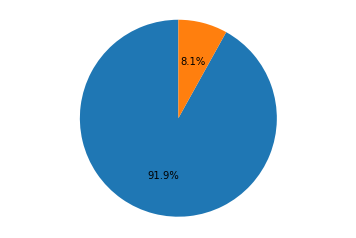

In [6]:
#クラス毎のデータ数
target_count = df["TARGET"].value_counts()
print(target_count)


plt.pie(target_count, startangle=90, autopct="%1.1f%%")
plt.axis('equal')
plt.show()

In [7]:
# デフォルトした人のデータを取り出してみる
target1 = df[df.TARGET == 1]
target0 = df[df.TARGET == 0]

In [8]:
# 欠損率をみる

target1_missing_ratio = target1.isnull().sum() / 24825 * 100

In [9]:
target0_missing_ratio = target0.isnull().sum() / 282686 * 100

In [10]:
# 欠損率の　デフォルト　ー　返済した人

missing_ratio_gap = target1_missing_ratio - target0_missing_ratio

In [11]:
# 欠損率の差が０でない値を取り出す
#(~~~MODE,MEDI,AVGは扱いがわからないが欠損していることに意味があるかも)

missing_ratio_gap_not0 = missing_ratio_gap[missing_ratio_gap != 0].sort_values(ascending=False)
missing_ratio_gap_not0[30:70]

# AMT_REQ_CREDIT_BUREAU_YEAR, OWN_CAR_AGE, 
# OCCUPATION_TYPE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE
#あたりが気になる

LANDAREA_AVG                  5.975770
YEARS_BUILD_MEDI              5.446432
YEARS_BUILD_MODE              5.446432
YEARS_BUILD_AVG               5.446432
FLOORSMIN_MEDI                5.103117
FLOORSMIN_MODE                5.103117
FLOORSMIN_AVG                 5.103117
LIVINGAPARTMENTS_AVG          5.051871
LIVINGAPARTMENTS_MEDI         5.051871
LIVINGAPARTMENTS_MODE         5.051871
FONDKAPREMONT_MODE            5.031057
NONLIVINGAPARTMENTS_MODE      4.777491
NONLIVINGAPARTMENTS_MEDI      4.777491
NONLIVINGAPARTMENTS_AVG       4.777491
COMMONAREA_AVG                4.720243
COMMONAREA_MODE               4.720243
COMMONAREA_MEDI               4.720243
AMT_REQ_CREDIT_BUREAU_YEAR    4.119995
AMT_REQ_CREDIT_BUREAU_QRT     4.119995
AMT_REQ_CREDIT_BUREAU_HOUR    4.119995
AMT_REQ_CREDIT_BUREAU_WEEK    4.119995
AMT_REQ_CREDIT_BUREAU_DAY     4.119995
AMT_REQ_CREDIT_BUREAU_MON     4.119995
OWN_CAR_AGE                   3.798190
EXT_SOURCE_1                  3.393374
EXT_SOURCE_3             

In [12]:
#文字データの列を取り出す
df_str = df.select_dtypes(include=object)

In [13]:
# 数字データの列を取り出す
df_number = df.select_dtypes(include='number')

In [14]:
# 数値データから〜〜〜MODE,MEDI,AVGを消す
temp = pd.Series(df_number.columns.values)

mode = temp[temp.str.contains('MODE')]
medi = temp[temp.str.contains('MEDI')]
avg = temp[temp.str.contains('AVG')]

delete_clumns = pd.concat([mode, medi, avg])

df_number_delete_MODE = df_number.drop(delete_clumns, axis=1)

In [15]:
#データまとめ

# 人数
number_people0 = 282686
number_people1 = 24825

#全体
df

#デフォルトしたか、しないか
target1 = df[df.TARGET == 1]
target0 = df[df.TARGET == 0]

#数値データの列
df_number = df.select_dtypes(include='number')
#数値データの中から~~~MODE,MEDI,AVGを除外したもの
df_number_delete_MODE

#文字データの列
df_str = df.select_dtypes(include=object)

#数値データの中でデフォルトしたか
target1_number = df_number[df_number.TARGET == 1]
target0_number = df_number[df_number.TARGET == 0]

#文字データの中でデフォルトしたか
target1_str = target1.select_dtypes(include=object)
target0_str = target0.select_dtypes(include=object)

# 数値データの相関係数
df_number_corr = df_number.corr()
corr_about_target = df_number_corr.TARGET.sort_values(ascending=False)

In [16]:
(corr_about_target*100).head(60)

# DAYS_BIRTH, REGION_RATING_CLIENT_W_CITY, REGION_RATING_CLIENT, DAYS_LAST_PHONE_CHANGE, DAYS_ID_PUBLISH , REG_CITY_NOT_WORK_CITY
# が気になる

TARGET                          100.000000
DAYS_BIRTH                        7.823931
REGION_RATING_CLIENT_W_CITY       6.089267
REGION_RATING_CLIENT              5.889901
DAYS_LAST_PHONE_CHANGE            5.521848
DAYS_ID_PUBLISH                   5.145717
REG_CITY_NOT_WORK_CITY            5.099446
FLAG_EMP_PHONE                    4.598222
REG_CITY_NOT_LIVE_CITY            4.439537
FLAG_DOCUMENT_3                   4.434635
DAYS_REGISTRATION                 4.197486
OWN_CAR_AGE                       3.761156
LIVE_CITY_NOT_WORK_CITY           3.251834
DEF_30_CNT_SOCIAL_CIRCLE          3.224758
DEF_60_CNT_SOCIAL_CIRCLE          3.127647
FLAG_WORK_PHONE                   2.852432
AMT_REQ_CREDIT_BUREAU_YEAR        1.992986
CNT_CHILDREN                      1.918713
CNT_FAM_MEMBERS                   0.930778
OBS_30_CNT_SOCIAL_CIRCLE          0.913067
OBS_60_CNT_SOCIAL_CIRCLE          0.902214
REG_REGION_NOT_WORK_REGION        0.694191
REG_REGION_NOT_LIVE_REGION        0.557594
FLAG_DOCUME

In [17]:
(corr_about_target*100).tail(60)

FLAG_DOCUMENT_11                -0.422935
FLAG_DOCUMENT_9                 -0.435241
FLAG_DOCUMENT_15                -0.653566
FLAG_DOCUMENT_18                -0.795239
FLAG_DOCUMENT_8                 -0.804038
YEARS_BEGINEXPLUATATION_MODE    -0.903645
FLAG_DOCUMENT_14                -0.946382
YEARS_BEGINEXPLUATATION_AVG     -0.972767
YEARS_BEGINEXPLUATATION_MEDI    -0.999310
LANDAREA_MODE                   -1.017410
LANDAREA_AVG                    -1.088482
LANDAREA_MEDI                   -1.125583
FLAG_DOCUMENT_13                -1.158322
FLAG_DOCUMENT_16                -1.161467
AMT_REQ_CREDIT_BUREAU_MON       -1.246242
NONLIVINGAREA_MODE              -1.271054
AMT_ANNUITY                     -1.281656
NONLIVINGAREA_MEDI              -1.333672
NONLIVINGAREA_AVG               -1.357807
COMMONAREA_MODE                 -1.634034
ENTRANCES_MODE                  -1.738742
COMMONAREA_AVG                  -1.854966
COMMONAREA_MEDI                 -1.857287
ENTRANCES_MEDI                  -1

In [18]:
#数値データの中から~~~MODE,MEDI,AVGを除外したものの相関係数
df_number_corr2 = df_number_delete_MODE.corr()
corr_about_target2 = df_number_corr2.TARGET.sort_values(ascending=False)

(corr_about_target2*100).tail(20)

# DAYS_EMPLOYED, AMT_GOODS_PRICE, REGION_POPULATION_RELATIVE, AMT_CREDIT, HOUR_APPR_PROCESS_START
#あたりが気になる

FLAG_DOCUMENT_11              -0.422935
FLAG_DOCUMENT_9               -0.435241
FLAG_DOCUMENT_15              -0.653566
FLAG_DOCUMENT_18              -0.795239
FLAG_DOCUMENT_8               -0.804038
FLAG_DOCUMENT_14              -0.946382
FLAG_DOCUMENT_13              -1.158322
FLAG_DOCUMENT_16              -1.161467
AMT_REQ_CREDIT_BUREAU_MON     -1.246242
AMT_ANNUITY                   -1.281656
FLAG_PHONE                    -2.380627
HOUR_APPR_PROCESS_START       -2.416583
FLAG_DOCUMENT_6               -2.860189
AMT_CREDIT                    -3.036929
REGION_POPULATION_RELATIVE    -3.722715
AMT_GOODS_PRICE               -3.964528
DAYS_EMPLOYED                 -4.493166
EXT_SOURCE_1                 -15.531713
EXT_SOURCE_2                 -16.047167
EXT_SOURCE_3                 -17.891870
Name: TARGET, dtype: float64

In [19]:
#全ての文字データの数値化に挑戦してみる

temp = pd.Series(df_str.columns.values)
df_str_count = {}
df_str_label_number = {}
for i in temp:
    vc = df_str[i].value_counts()
    #print(vc)
    df_str_count[i] = vc
#print(df_str_count)

#辞書内のリストのキーを辞書化し、０、１とナンバリング
for j in df_str_count.keys():
    df_str_count[j]
    count = 0
    for key in df_str_count[j].keys():
        if key not in df_str_label_number:
            df_str_label_number[key] = count
            count += 1

#値を置き換え
df_str_number = df_str.replace(df_str_label_number)

print(df_str_label_number)
#文字データの項目のナンバリングに成功
#ただ、この方法では、no,yesなどの、かぶった項目をユニークなものとしていない
#また、出現した順に数字を振るので、順序がある項目に順序をつけられない方法である

{'Cash loans': 0, 'Revolving loans': 1, 'F': 0, 'M': 1, 'XNA': 2, 'N': 0, 'Y': 1, 'Unaccompanied': 0, 'Family': 1, 'Spouse, partner': 2, 'Children': 3, 'Other_B': 4, 'Other_A': 5, 'Group of people': 6, 'Working': 0, 'Commercial associate': 1, 'Pensioner': 2, 'State servant': 3, 'Unemployed': 4, 'Student': 5, 'Businessman': 6, 'Maternity leave': 7, 'Secondary / secondary special': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Academic degree': 4, 'Married': 0, 'Single / not married': 1, 'Civil marriage': 2, 'Separated': 3, 'Widow': 4, 'Unknown': 5, 'House / apartment': 0, 'With parents': 1, 'Municipal apartment': 2, 'Rented apartment': 3, 'Office apartment': 4, 'Co-op apartment': 5, 'Laborers': 0, 'Sales staff': 1, 'Core staff': 2, 'Managers': 3, 'Drivers': 4, 'High skill tech staff': 5, 'Accountants': 6, 'Medicine staff': 7, 'Security staff': 8, 'Cooking staff': 9, 'Cleaning staff': 10, 'Private service staff': 11, 'Low-skill Laborers': 12, 'Waiters/barmen st

In [20]:
#TARGETと結合
df_str_numbers = pd.concat([df_str_number,df["TARGET"]], axis=1)

## 【問題3】課題設定

### 欠損率が高いのはデフォルトした人ではないか
### 欠損値からは
AMT_REQ_CREDIT_BUREAU_YEAR, OWN_CAR_AGE, OCCUPATION_TYPE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE
### 相関係数が高いものは、
DAYS_BIRTH, REGION_RATING_CLIENT_W_CITY, REGION_RATING_CLIENT, DAYS_LAST_PHONE_CHANGE, DAYS_ID_PUBLISH , REG_CITY_NOT_WORK_CITY
### 相関係数が低いものは、
DAYS_EMPLOYED, AMT_GOODS_PRICE, REGION_POPULATION_RELATIVE, AMT_CREDIT, HOUR_APPR_PROCESS_START

### 上記について調べていく

## 【問題4】データ探索

### 欠損率が高いのはデフォルトした人ではないか

Text(0,0.5,'total_missing_ratio')

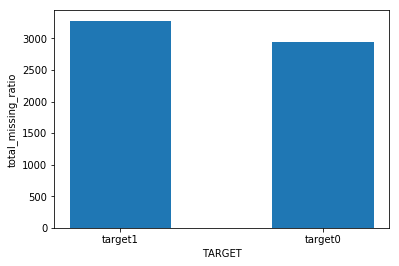

In [21]:
x = ["target1", "target0"]
y = [target1_missing_ratio.sum(),target0_missing_ratio.sum()]


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.bar(x, y, tick_label=x, width = 0.5)
ax.set_xlabel("TARGET")
ax.set_ylabel("total_missing_ratio")

#デフォルトした人の方が欠損率が高い

In [22]:
"""
# target1とtarget０　の columでの件数のそれぞれの母数に対する比率を取ったもの
def bar_plot(column):

    x = ["target1", "target0"]
    #target1とtarget0の母数が違うので比率をとる
    y = [target1[column].sum() / (len(target1[column]) - target1[column].isnull().sum(),  target0[column].sum() / (len(target0[column]) - target0[column].isnull().sum())]
    ax.bar(x, y, tick_label=x, width = 0.5)
    ax.set_ylabel(column)

"""

'\n# target1とtarget０\u3000の columでの件数のそれぞれの母数に対する比率を取ったもの\ndef bar_plot(column):\n\n    x = ["target1", "target0"]\n    #target1とtarget0の母数が違うので比率をとる\n    y = [target1[column].sum() / (len(target1[column]) - target1[column].isnull().sum(),  target0[column].sum() / (len(target0[column]) - target0[column].isnull().sum())]\n    ax.bar(x, y, tick_label=x, width = 0.5)\n    ax.set_ylabel(column)\n\n'

### AMT_REQ_CREDIT_BUREAU_YEAR が高いのはデフォルトした人ではないか
AMT_REQ_CREDIT_BUREAU_YEAR 1日のクライアントに関するクレジットビューローへの問い合わせ数（申請前の最後の3か月を除く）

Text(0,0.5,'AMT_REQ_CREDIT_BUREAU')

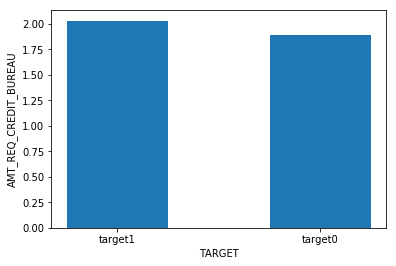

In [23]:
x = ["target1", "target0"]
y = [target1["AMT_REQ_CREDIT_BUREAU_YEAR"].sum() / (len(target1["AMT_REQ_CREDIT_BUREAU_YEAR"]) - target1["AMT_REQ_CREDIT_BUREAU_YEAR"].isnull().sum().sum()), target0["AMT_REQ_CREDIT_BUREAU_YEAR"].sum() / (len(target0["AMT_REQ_CREDIT_BUREAU_YEAR"]) - target0["AMT_REQ_CREDIT_BUREAU_YEAR"].isnull().sum().sum())]


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.bar(x, y, tick_label=x, width = 0.5)
ax.set_xlabel("TARGET")
ax.set_ylabel("AMT_REQ_CREDIT_BUREAU")

#若干だが、問い合わせ回数が、デフォルトした人の方が多い

### OWN_CAR_AGEの年数が高いのはデフォルトした人ではないか

Text(0,0.5,'OWN_CAR_AGE')

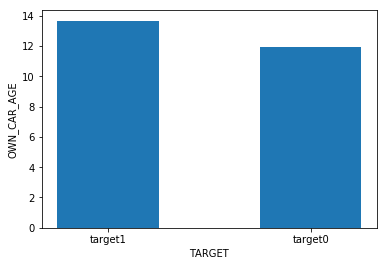

In [24]:
#OWN_CAR_AGE
x = ["target1", "target0"]
y = [target1["OWN_CAR_AGE"].sum()/(len(target1["OWN_CAR_AGE"]) - target1["OWN_CAR_AGE"].isnull().sum().sum()), target0["OWN_CAR_AGE"].sum()/(len(target0["OWN_CAR_AGE"]) - target0["OWN_CAR_AGE"].isnull().sum().sum())]


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.bar(x, y, tick_label=x, width = 0.5)
ax.set_xlabel("TARGET")
ax.set_ylabel("OWN_CAR_AGE")

#デフォルトした人の車は古い

### OCCUPATION_TYPEの分析
Core staffやManagersがデフォルトしていない人に多いのではないか  

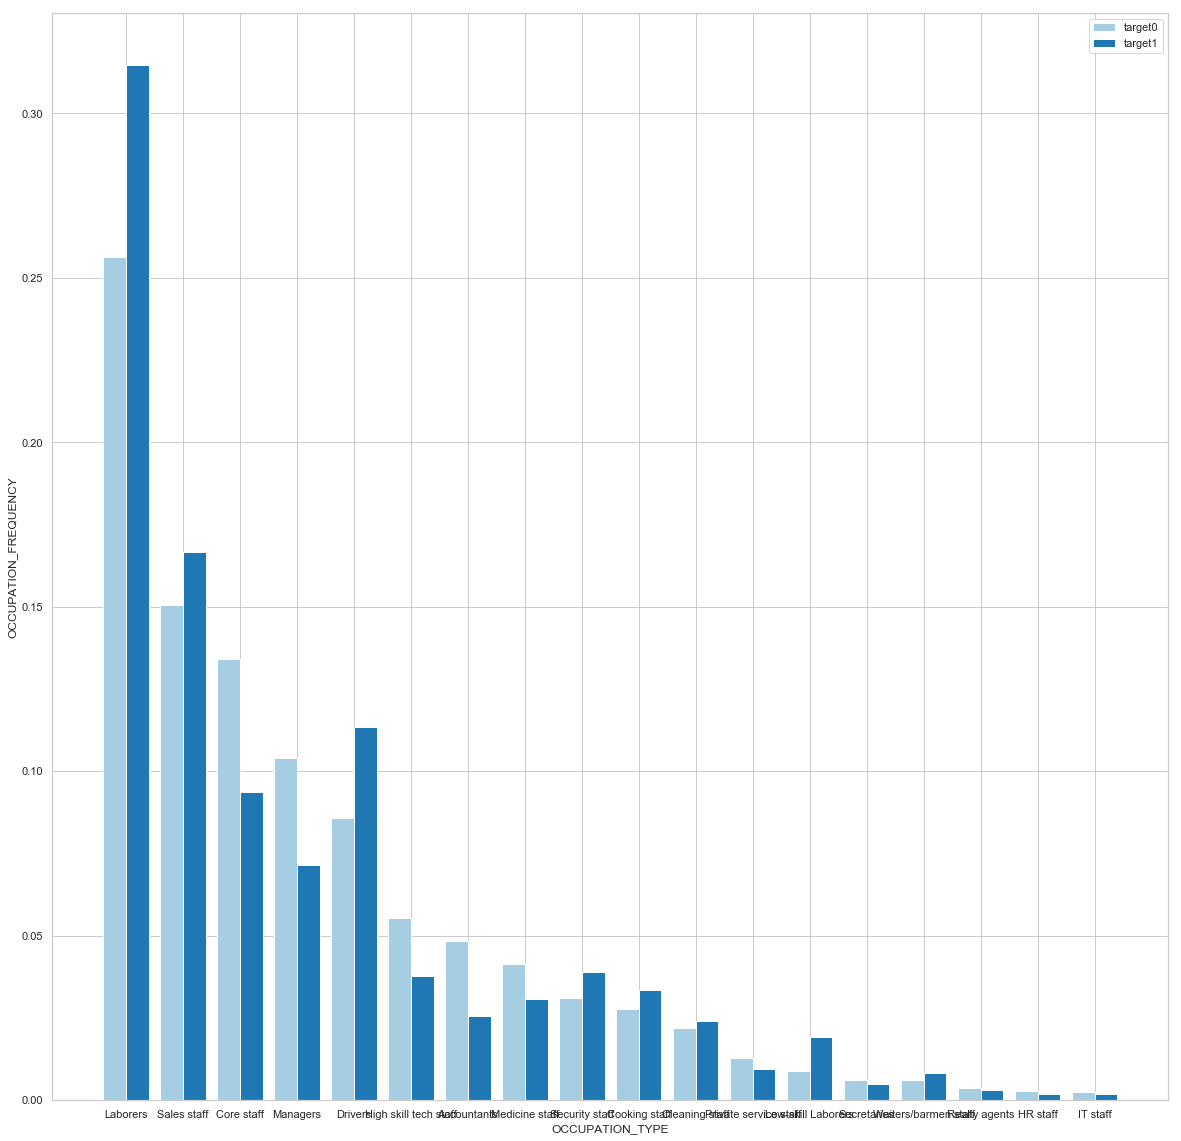

In [25]:
# OCCUPATION_TYPE:クライアントにはどのような職業があるか

value = "OCCUPATION_TYPE"
a = target0[value].value_counts()
x = a.index
y = a / target0[value].value_counts().sum()

c = target1[value].value_counts().loc[x]#.loc[x]で[x]の順に職業の並び替え
z = c / target1[value].value_counts().sum()

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Paired')

x_position = np.arange(len(x))

fig = plt.figure(figsize=(20,20),facecolor="w")
ax = fig.add_subplot(1, 1, 1)
ax.bar(x_position, y, width=0.4, label='target0')
ax.bar(x_position + 0.4, z, width=0.4, label='target1')
ax.legend()
ax.set_xticks(x_position + 0.2)
ax.set_xticklabels(x)
ax.set_xlabel("OCCUPATION_TYPE")#職業の種類
ax.set_ylabel("OCCUPATION_FREQUENCY")#職業の出現頻度
plt.show()

#　デフォルトしていない人に、専門職やマネージャーなどが多い

### 年齢が高い方がデフォルトしないのではないか
・DAYS_BIRTH申請時のクライアントの年齢（日数）<br>
・データが、申請日からマイナス〜〜日に生まれたと表示されている

/Users/takamoriyuki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


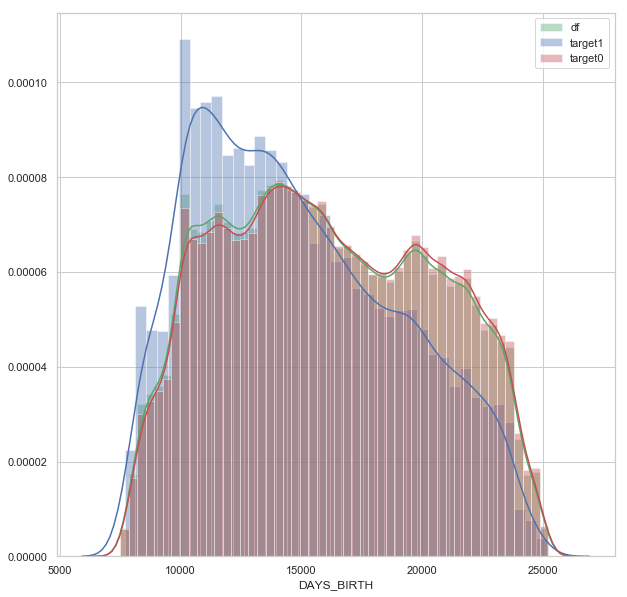

In [26]:
#DAYS_BIRTH申請時のクライアントの年齢（日数）
#データが、申請日からマイナス〜〜日に生まれたと表示されている
#よって絶対値をとってから図示する
#借り手全体とデフォルトした人の分布を比較する


fig = plt.figure(figsize=(10,10),facecolor="w")
ax = sns.distplot(df["DAYS_BIRTH"].abs(), label="df", color="g")
ax = sns.distplot(target1["DAYS_BIRTH"].abs(), label="target1", color="b")
ax = sns.distplot(target0["DAYS_BIRTH"].abs(), label="target0", color="r")
ax.legend()
plt.show()

#若い人の方がデフォルト率が高いことがわかる

### では、年齢が若い人はどのような特徴を持っているのか
・若い人をざっくりと上の図の１５０００より左の人とする<br>
・若い人でもデフォルトした人としていない人の違いは？

In [27]:
#数値データについて相関係数を見てみる
corr_days_birth = pd.DataFrame(df_number_corr["DAYS_BIRTH"].sort_values(ascending=False))
corr_days_birth*100

display(corr_days_birth.head(15))
display(corr_days_birth.tail(15))

#DAYS_BIRTHが申請日マイナス生まれてから何日たったかなので、数が大きい人の方が若い(マイナス表記)
#正の相関としては、職場の電話番号の提出率が高い。社会人現役の人が多いことと、よく使うからだろうか。
#負の相関としては、DAYS_EMPLOYED（今の職場に就いてからどれくらいの期間か）の値が大きい。そもそも若いことと、転職などの影響もあるか。

,DAYS_BIRTH
DAYS_BIRTH,1.000000
FLAG_EMP_PHONE,0.619888
DAYS_REGISTRATION,0.331912
CNT_CHILDREN,0.330938
CNT_FAM_MEMBERS,0.278894
DAYS_ID_PUBLISH,0.272691
REG_CITY_NOT_WORK_CITY,0.242401
REG_CITY_NOT_LIVE_CITY,0.180382
FLAG_WORK_PHONE,0.172457
LIVE_CITY_NOT_WORK_CITY,0.158882


,DAYS_BIRTH
ENTRANCES_MODE,-0.009374
ENTRANCES_MEDI,-0.009876
ENTRANCES_AVG,-0.010281
AMT_REQ_CREDIT_BUREAU_QRT,-0.011799
FLAG_CONT_MOBILE,-0.014985
REGION_POPULATION_RELATIVE,-0.029582
FLAG_PHONE,-0.042402
AMT_GOODS_PRICE,-0.053442
AMT_CREDIT,-0.055436
AMT_REQ_CREDIT_BUREAU_YEAR,-0.071983


In [28]:
#文字データについて考察する

df_young = df[df["DAYS_BIRTH"] >= -15000]

df_str_young1 = df_young[df_young.TARGET == 1]
df_str_young0 = df_young[df_young.TARGET == 0]

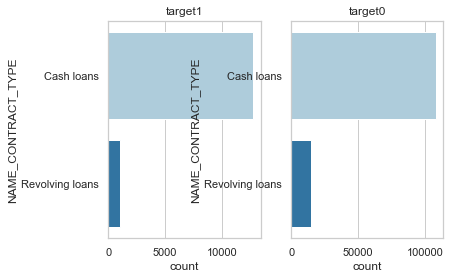

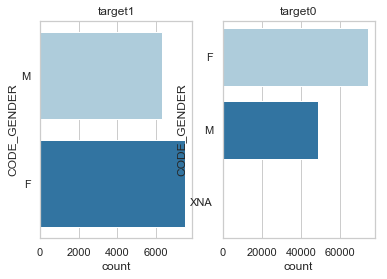

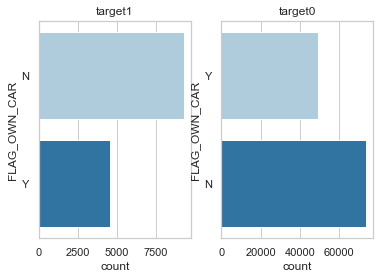

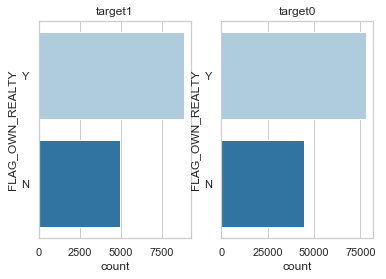

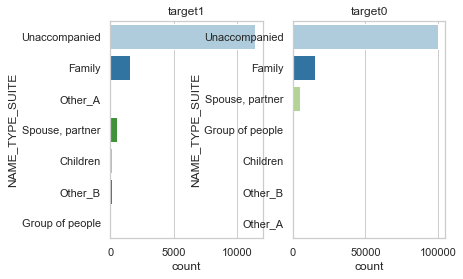

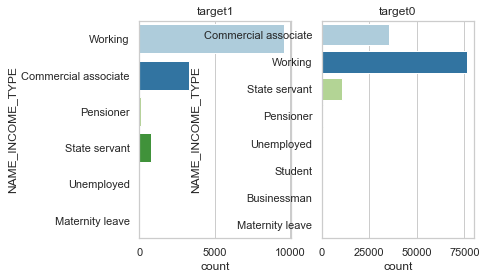

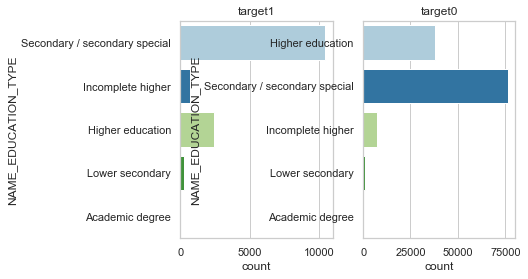

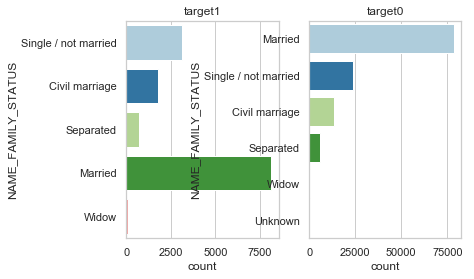

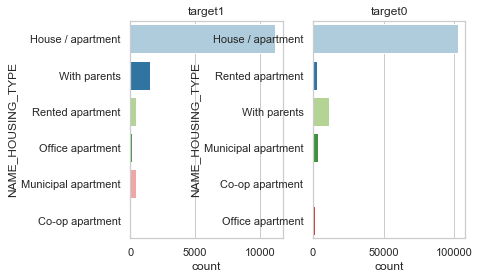

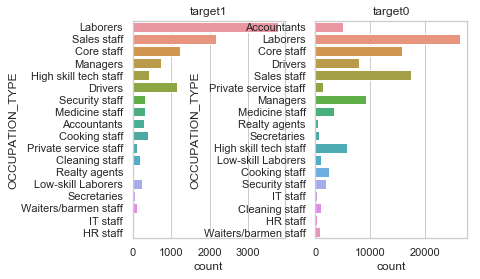

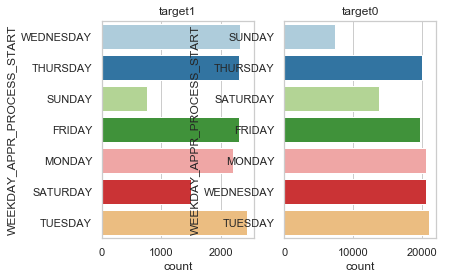

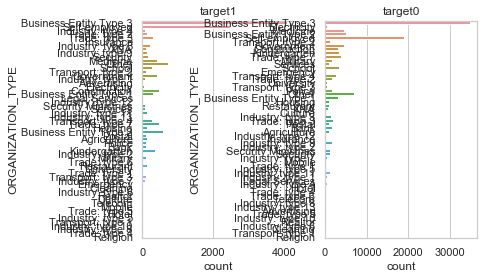

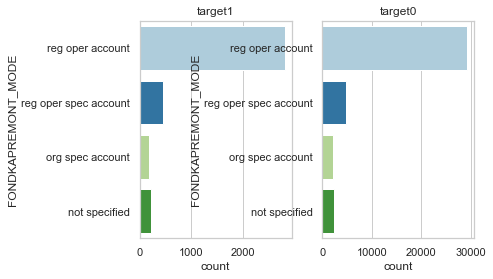

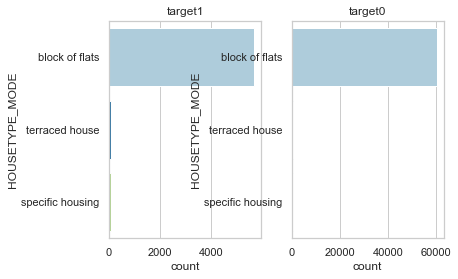

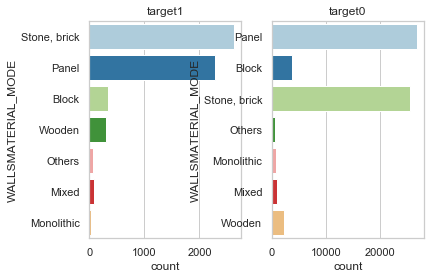

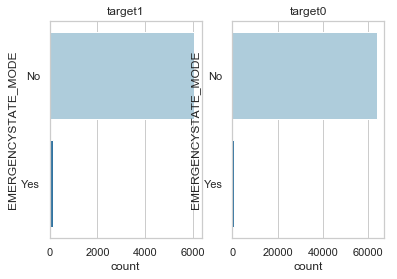

In [29]:
for column in df_str.columns:
    fig = plt.figure(facecolor="w")
    ax = fig.add_subplot(1, 2, 1)
    plt.title("target1")
    sns.countplot(y=df_str_young1[column])
    ax = fig.add_subplot(1, 2, 2)
    plt.title("target0")
    sns.countplot(y=df_str_young0[column], label = "target0")
    plt.show()
    

- target1とtarget0の母数が違うので数値の大小ではなく、比率の違いをみることに注意（項目の順序の違いなど）
<br>
1. GENDER、車の所持、などはわかりやすく差がある　　
2. 家の所持の比率は変わらない
3. 予想に反するものも多かった。

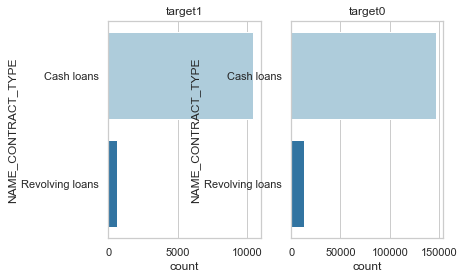

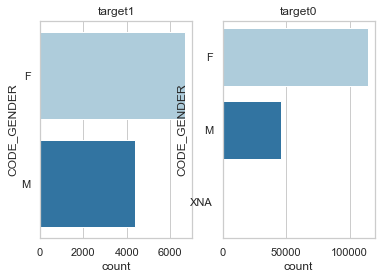

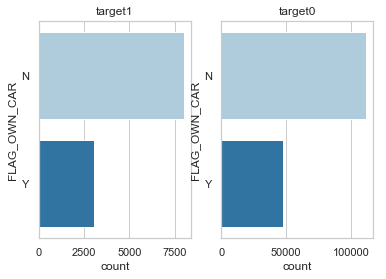

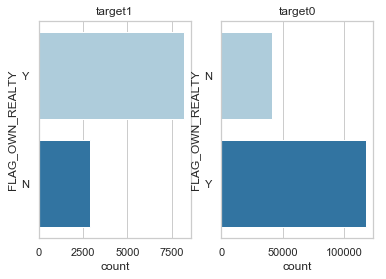

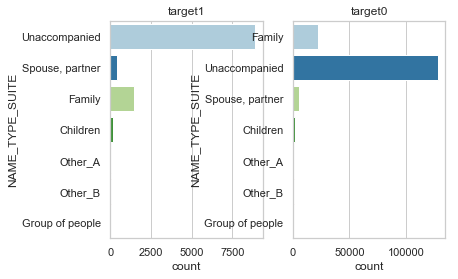

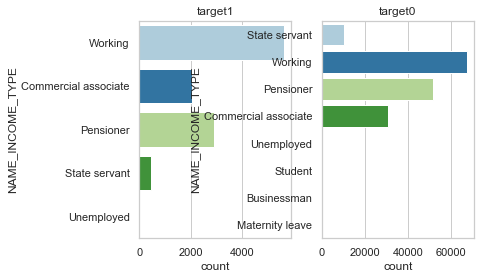

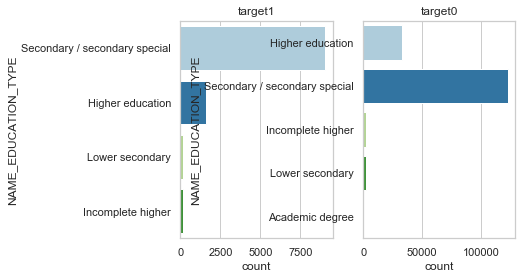

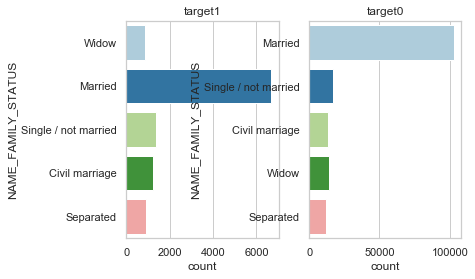

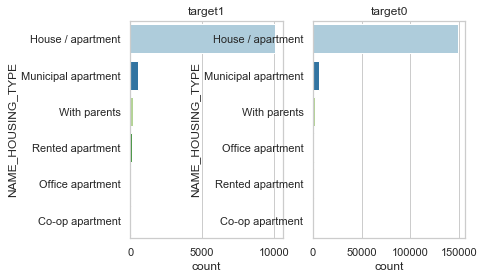

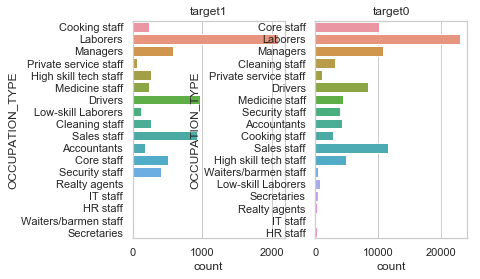

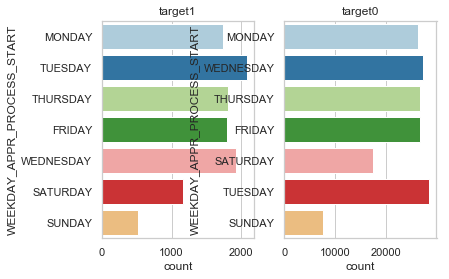

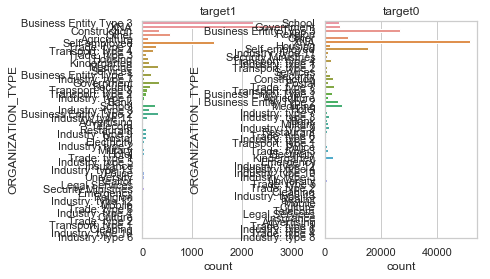

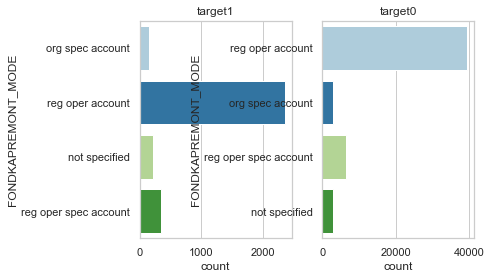

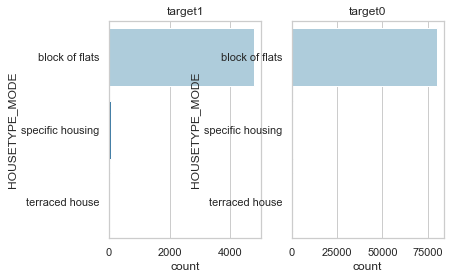

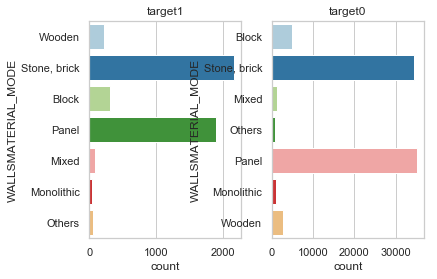

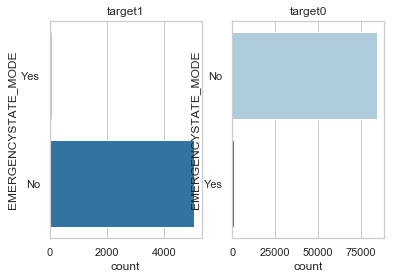

In [30]:
#では、若くない人について

df_old = df[df["DAYS_BIRTH"] < -15000]

df_str_old1 = df_old[df_old.TARGET == 1]
df_str_old0 = df_old[df_old.TARGET == 0]

for column in df_str.columns:
    fig = plt.figure(facecolor="w")
    ax = fig.add_subplot(1, 2, 1)
    plt.title("target1")
    sns.countplot(y=df_str_old1[column])
    ax = fig.add_subplot(1, 2, 2)
    plt.title("target0")
    sns.countplot(y=df_str_old0[column], label = "target0")
    plt.show()
    

### REGION_RATING_CLIENT_W_CITYについての分析
REGION_RATING_CLIENT_W_CITY都市を考慮に入れてクライアントが住んでいる地域の評価（1,2,3）<br>
1~3でレーティングされているので、それぞれ目的変数の分布を見る

In [31]:
def region_plot(region):
    temp1 = region[region["TARGET"] == 1]
    temp0 = region[region["TARGET"] == 0]
    temp_target1 = temp1["TARGET"]
    temp_target0 = temp0["TARGET"]
    #母数が違うので比率をとる
    temp_target1_ratio = len(temp_target1) / (len(target1["TARGET"]) - target1["TARGET"].isnull().sum())
    temp_target0_ratio = len(temp_target0) / (len(target0["TARGET"]) - target0["TARGET"].isnull().sum())
    
    #グラフのプロット
    ax.bar(0, temp_target1_ratio, label='target1', tick_label='target1')
    ax.bar(1, temp_target0_ratio, label='target0', tick_label='target0')
    ax.set_xlabel("TARGET")
    ax.set_ylabel("REGION_RATING_CLIENT_W_CITY_FREQUENCY")
    ax.grid(True)
    

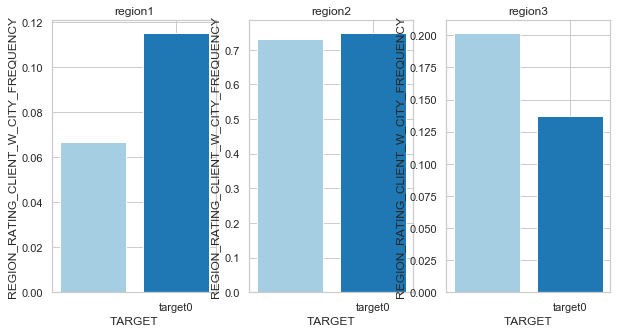

In [32]:
region1 = df_number[df_number["REGION_RATING_CLIENT_W_CITY"] == 1]
region2 = df_number[df_number["REGION_RATING_CLIENT_W_CITY"] == 2]
region3 = df_number[df_number["REGION_RATING_CLIENT_W_CITY"] == 3]

fig = plt.figure(figsize=(10,5),facecolor="w")

ax = fig.add_subplot(1, 3, 1)
plt.title("region1")
region_plot(region1)

ax = fig.add_subplot(1, 3, 2)
plt.title("region2")
region_plot(region2)

ax = fig.add_subplot(1, 3, 3)
plt.title("region3")
region_plot(region3)

#居住地区に対する1~3のレーティングのどちらが高い評価なのか、その指標もわからないが、
#デフォルトしていない人が多いregion1が高い評価のように思う。

### EXT_SOURCE_3がデフォルトした人との負の相関がー０.１７とズバ抜けていたのでどのようなデータなのか探索
- EXT_SOURCE_3　：　外部データソースからの正規化スコア<br>
これ以外の説明がない

In [33]:
df["EXT_SOURCE_3"].head(10)

0    0.139376
1         NaN
2    0.729567
3         NaN
4         NaN
5    0.621226
6    0.492060
7    0.540654
8    0.751724
9         NaN
Name: EXT_SOURCE_3, dtype: float64

In [34]:
df["EXT_SOURCE_3"].describe()
#0~1の間の数字
#平均も中央値もほぼ０.５

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [35]:
missing_ratio_ext = df["EXT_SOURCE_3"].isnull().sum() / 307511 * 100
missing_ratio_ext
#欠損率２０％

19.825307062186393

In [36]:
#target0    282686人
#target1     24825人

#デフォルトしている人としてない人の欠損している率をみる
display(target1["EXT_SOURCE_3"].isnull().sum() / 24825*100)
display(target0["EXT_SOURCE_3"].isnull().sum() / 282686*100)

#２０％前後で変わりなし

22.86807653575025

19.558096262283946

In [37]:
corr_ext3 = df_number_corr["EXT_SOURCE_3"].sort_values(ascending=False)

In [38]:
pd.DataFrame(corr_ext3.head(20))

,EXT_SOURCE_3
EXT_SOURCE_3,1.000000
EXT_SOURCE_1,0.186846
DAYS_EMPLOYED,0.113434
EXT_SOURCE_2,0.109167
FLAG_DOCUMENT_6,0.074970
AMT_GOODS_PRICE,0.047717
AMT_CREDIT,0.043516
AMT_ANNUITY,0.030752
YEARS_BUILD_AVG,0.015680
YEARS_BUILD_MEDI,0.015386


In [39]:
pd.DataFrame(corr_ext3.tail(20))

,EXT_SOURCE_3
DEF_60_CNT_SOCIAL_CIRCLE,-0.034096
DEF_30_CNT_SOCIAL_CIRCLE,-0.036253
HOUR_APPR_PROCESS_START,-0.040518
CNT_CHILDREN,-0.042710
LIVE_CITY_NOT_WORK_CITY,-0.044310
REG_REGION_NOT_WORK_REGION,-0.049143
REG_REGION_NOT_LIVE_REGION,-0.049162
FLAG_EMAIL,-0.052172
FLAG_WORK_PHONE,-0.063617
AMT_REQ_CREDIT_BUREAU_YEAR,-0.071449


In [40]:
#デフォルトした人としていない人の散布図をとる関数

def scatter_plot(param1, param2):
    fig = plt.figure(figsize=(10,10),facecolor="w")
    ax = fig.add_subplot(1, 1, 1)
    ax.grid(True)
    ax.scatter(target0[param1] ,target0[param2] ,color = 'b',label ="target0" )
    ax.scatter(target1[param1] ,target1[param2] ,color = 'r',label ="target1")
    ax.set_xlabel(param1)
    ax.set_ylabel(param2)
    ax.legend()
    ax.grid(True)
    
    return

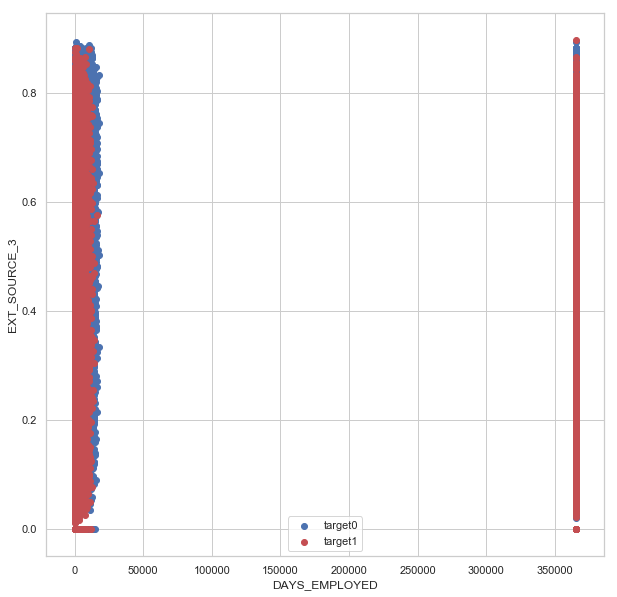

In [41]:
param1 = "DAYS_EMPLOYED"
param2 = "EXT_SOURCE_3"

fig = plt.figure(figsize=(10,10),facecolor="w")
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
ax.scatter(target0[param1].abs() ,target0[param2] ,color = 'b',label ="target0" )
ax.scatter(target1[param1].abs() ,target1[param2] ,color = 'r',label ="target1")
ax.set_xlabel(param1)
ax.set_ylabel(param2)
ax.legend()
ax.grid(True)

#EXT_SOURCE_3は勤続日数と関係が深いようだ。
#中間がすっぽりと抜けている
#何かしらの統計データのようだが、どのようなモデルなのだろうか。。。

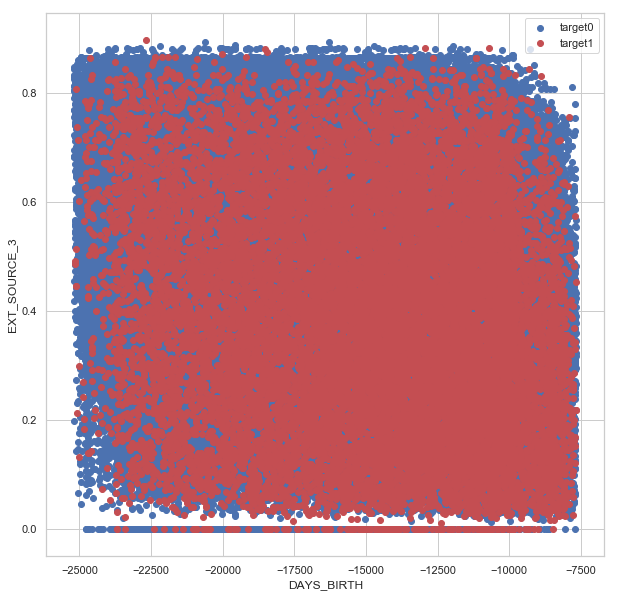

In [42]:
scatter_plot("DAYS_BIRTH", "EXT_SOURCE_3")

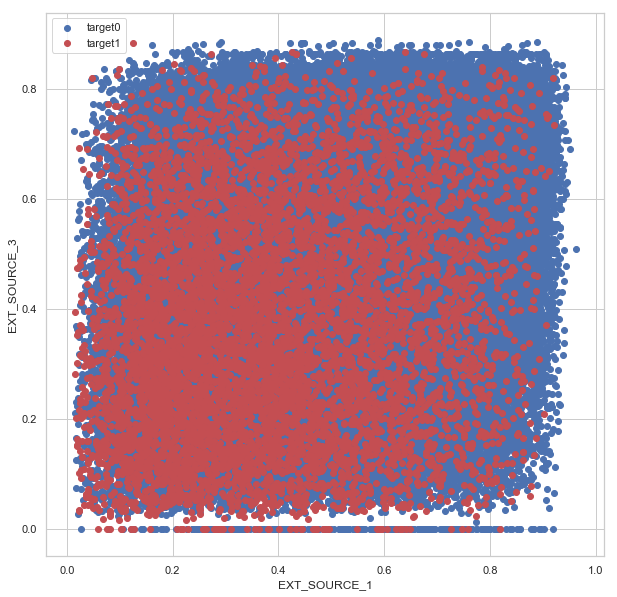

In [43]:
scatter_plot("EXT_SOURCE_1", "EXT_SOURCE_3")